In [1]:
import numpy as np
from osgeo import gdal

# Enable GDAL exceptions
gdal.UseExceptions()

# Load DEM data
dem_file = 'C:/Users/leeyj/Downloads/Test_DEM.tif'
dataset = gdal.Open(dem_file)
band = dataset.GetRasterBand(1)
elevation = band.ReadAsArray()

# Get geotransform info
geotransform = dataset.GetGeoTransform()

# Initialize an empty list to store the data
matrix = []

# Calculate longitude, latitude, and elevation for each pixel
for y in range(elevation.shape[0]):
    row = []
    for x in range(elevation.shape[1]):
        longitude = geotransform[0] + x*geotransform[1] + y*geotransform[2]
        latitude = geotransform[3] + x*geotransform[4] + y*geotransform[5]
        elev = elevation[y, x]
        row.append((elev, longitude, latitude))
    matrix.append(row)

# Convert the list to a NumPy array for more efficient operations and handling
matrix_np = np.array(matrix)

# Now `matrix_np` contains the elevation, longitude, and latitude for each pixel

In [2]:
matrix_np

array([[[869.        , 126.99986111,  39.00013889],
        [872.        , 127.00013889,  39.00013889],
        [873.        , 127.00041667,  39.00013889],
        ...,
        [  0.        , 127.99930556,  39.00013889],
        [  0.        , 127.99958333,  39.00013889],
        [  0.        , 127.99986111,  39.00013889]],

       [[870.        , 126.99986111,  38.99986111],
        [867.        , 127.00013889,  38.99986111],
        [863.        , 127.00041667,  38.99986111],
        ...,
        [  0.        , 127.99930556,  38.99986111],
        [  0.        , 127.99958333,  38.99986111],
        [  0.        , 127.99986111,  38.99986111]],

       [[867.        , 126.99986111,  38.99958333],
        [863.        , 127.00013889,  38.99958333],
        [858.        , 127.00041667,  38.99958333],
        ...,
        [  0.        , 127.99930556,  38.99958333],
        [  0.        , 127.99958333,  38.99958333],
        [  0.        , 127.99986111,  38.99958333]],

       ...,

      

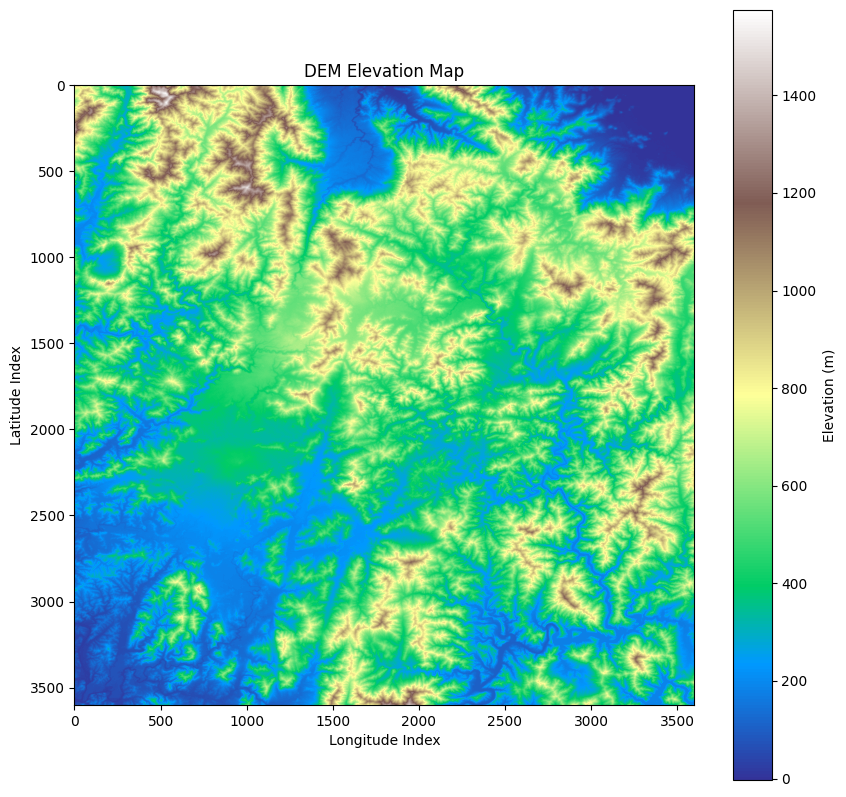

In [3]:
import matplotlib.pyplot as plt

# Assuming `elevation` contains your elevation data as a 2D NumPy array
plt.figure(figsize=(10, 10))
plt.imshow(elevation, cmap='terrain')
plt.colorbar(label='Elevation (m)')
plt.title('DEM Elevation Map')
plt.xlabel('Longitude Index')
plt.ylabel('Latitude Index')
plt.show()

In [5]:
def get_data_at_index(matrix, lon_index, lat_index):
    """
    Retrieve elevation, longitude, and latitude data for a specific pixel in the matrix.
    
    Parameters:
    - matrix: The data matrix containing tuples of (elevation, longitude, latitude).
    - lon_index: The longitude index of the pixel.
    - lat_index: The latitude index of the pixel.
    
    Returns:
    - A tuple containing the elevation, longitude, and latitude of the specified pixel, or None if indices are out of bounds.
    """
    # Check if the provided indices are within the bounds of the matrix
    if lat_index >= 0 and lat_index < len(matrix) and lon_index >= 0 and lon_index < len(matrix[0]):
        return matrix[lat_index][lon_index]
    else:
        return None

Elevation: 869.0, Longitude: 126.999861111, Latitude: 39.000138889


In [8]:
# Call function
lon_index = 3590
lat_index = 3586
data_at_index = get_data_at_index(matrix_np, lon_index, lat_index)

if data_at_index is not None:
    print(f"Elevation: {data_at_index[0]}, Longitude: {data_at_index[1]}, Latitude: {data_at_index[2]}")
else:
    print("Invalid indices provided.")

Elevation: 182.0, Longitude: 127.99708333344377, Latitude: 38.004027777667595


In [6]:
# Assuming `matrix_np` is your NumPy matrix
lat_max_index, lon_max_index = matrix_np.shape[0] - 1, matrix_np.shape[1] - 1

print(f"Maximum Latitude Index: {lat_max_index}")
print(f"Maximum Longitude Index: {lon_max_index}")

Maximum Latitude Index: 3600
Maximum Longitude Index: 3600


In [9]:
elevation_data = [[cell[0] for cell in row] for row in matrix_np]

# Assuming longitude and latitude values are evenly spaced and can be derived from the indices
lat_headers = [f"Lat_{i}" for i in range(matrix_np.shape[0])]
lon_headers = [f"Lon_{j}" for j in range(matrix_np.shape[1])]

import pandas as pd

# Convert elevation data to DataFrame
df = pd.DataFrame(elevation_data, columns=lon_headers)

# Optionally, if you want latitude values as the first column (as index)
df.insert(0, 'Latitude', lat_headers)

# Save to CSV
df.to_csv('elevation_matrix.csv', index=False)

In [13]:
import pandas as pd
import numpy as np

# Assuming matrix_np is your structured NumPy matrix with (elevation, longitude, latitude) for each cell
# First, let's extract the elevation data
elevation_data = [[cell[0] for cell in row] for row in matrix_np]

# Extract longitude and latitude values for headers
# For longitude, take the values from the first row
longitude_values = [cell[1] for cell in matrix_np[0]]  # Assuming all rows have the same longitude values across

# For latitude, take the latitude value of the last cell in each row
latitude_values = [row[-1][2] for row in matrix_np]  # Assuming all columns have the same latitude values down

# Convert elevation data into a DataFrame
df_direct_headers = pd.DataFrame(elevation_data, columns=longitude_values)

# Add latitude values as the first column of the DataFrame
df_direct_headers.insert(0, 'Latitude', latitude_values)

# Save the DataFrame to a CSV file
# csv_path_direct = 'C:/Users/leeyj/lab_ws/source'
df_direct_headers.to_csv('NK_DEM.csv', index=False)

# Note: Replace 'path/to/your/elevation_matrix_direct_headers.csv' with your desired file path